# Use of Fatal Force by the US Police

In the United States, use of deadly force by police has been a high-profile and contentious issue. 1000 people are shot and killed by US cops each year. The ever-growing argument is that the US has a flawed Law Enforcement system that costs too many innocent civilians their lives. In this project, we will analyze one of America’s hottest political topics, which encompasses issues ranging from institutional racism to the role of Law Enforcement personnel
in society.

We will use 5 data sets in this study. Four of them describes demographics of cities in the US (city data sets) while the remaining one records the fatal incidents (police data set).

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

## Data Preprocessing

In [ ]:
education = pd.read_csv('data/education.csv', encoding = "ISO-8859-1")
income = pd.read_csv('data/income.csv', encoding = "ISO-8859-1")
poverty = pd.read_csv('data/poverty.csv', encoding = "ISO-8859-1")
race = pd.read_csv('data/share_race_by_city.csv', encoding = "ISO-8859-1")
test = pd.read_csv('data/police_killings_test.csv', encoding = "ISO-8859-1")
train = pd.read_csv('data/police_killings_train.csv', encoding = "ISO-8859-1")

We first inspect and clean null data.

In [ ]:
test.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        3
age                         40
gender                       0
race                       104
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        38
body_camera                  0
dtype: int64

Also look for invalid values.

In [ ]:
# education has '-' as numbers

There is a discrepancy between the encoding of names between the police data set and city data sets. For example, the former refer LA in California as Los Angeles while the latter uses Los Angeles city.

We also observe that the police data set provide less information because it only has Chicago as a city, while the city data sets have Chicago city, Chicago Heights city and Chicago Ridge village. 

Assuming that cities bearing similar name should be geographically and demographically close to each other, we shall evenly distribute the number of fatal incidents between them.

In [ ]:
# count the number of incidents grouping by city and state because city names may duplicate
city_count = train.value_counts(['city', 'state']).rename_axis(['City', 'Geographic Area']).reset_index(name='Counts')
city_count.head()

,City,Geographic Area,Counts
0,Los Angeles,CA,31
1,Phoenix,AZ,24
2,Houston,TX,22
3,Chicago,IL,21
4,Las Vegas,NV,16


In [ ]:
merged = education.merge(income, on=['Geographic Area', 'City']).merge(poverty, on=['Geographic Area', 'City']).merge(race, on=['Geographic Area', 'City'])
merged.head()

,Geographic Area,City,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,21.2,11207,78.8,67.2,30.2,0,0,1.6
1,AL,Abbeville city,69.1,25615,29.1,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,78.9,42575,25.5,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,81.4,37083,30.7,99.1,0.1,0,0.1,0.4
4,AL,Akron town,68.6,21667,42,13.2,86.5,0,0,0.3


In [ ]:
def merge_count(record):
    # find record(s) matching both name and state
    match_city = merged['City'].str.startswith(record['City'])
    match_state = merged['Geographic Area'] == record['Geographic Area']
    match_both = np.logical_and(match_city, match_state)
    # count the number of True
    length = np.count_nonzero(match_both)
    if length == 1:
        # if unique
        merged.loc[match_both, 'Counts'] = record['Counts']
        return merged.loc[match_both]
    elif length > 1:
        # if multiple, take average
        count = record['Counts']/length
        merged.loc[match_both, 'Counts'] = count
        return merged.loc[match_both]

merged['Counts'] = 0
city_count.apply(merge_count, axis=1)

0            Geographic Area              City percent...
1            Geographic Area          City percent_com...
2             Geographic Area          City percent_co...
3            Geographic Area                   City pe...
4             Geographic Area            City percent_...
                              ...                        
1276          Geographic Area               City perce...
1277          Geographic Area                City perc...
1278         Geographic Area         City percent_comp...
1279          Geographic Area              City percen...
1280          Geographic Area         City percent_com...
Length: 1281, dtype: object

In [ ]:
merged.sort_values(by='Counts', ascending=False).head()

,Geographic Area,City,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Counts
2701,CA,Los Angeles city,75.5,50205,22.1,49.8,9.6,0.7,11.3,48.5,31.0
1198,AZ,Phoenix city,80.7,47326,23.1,65.9,6.5,2.2,3.2,40.8,24.0
25036,TX,Houston city,76.7,46187,22.5,50.5,23.7,0.7,6,43.8,22.0
15596,NV,Las Vegas city,83.3,50202,17.5,62.1,11.1,0.7,6.1,31.5,16.0
25744,TX,San Antonio city,81.4,46744,19.8,72.6,6.9,0.9,2.4,63.2,15.0


## Exploratory Data Analysis

In [ ]:
merged.head()

,Geographic Area,City,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Counts
0,AL,Abanda CDP,21.2,11207,78.8,67.2,30.2,0,0,1.6,0.0
1,AL,Abbeville city,69.1,25615,29.1,54.4,41.4,0.1,1,3.1,0.0
2,AL,Adamsville city,78.9,42575,25.5,52.3,44.9,0.5,0.3,2.3,0.0
3,AL,Addison town,81.4,37083,30.7,99.1,0.1,0,0.1,0.4,0.0
4,AL,Akron town,68.6,21667,42,13.2,86.5,0,0,0.3,0.0


In [ ]:
merged.tail()

,Geographic Area,City,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Counts
29110,WY,Woods Landing-Jelm CDP,100,NaN,18.6,95.9,0,0,2.1,0,0.0
29111,WY,Worland city,85.6,41523,15.3,89.9,0.3,1.3,0.6,16.6,0.0
29112,WY,Wright town,89.2,77114,5.9,94.5,0.1,1.4,0.2,6.2,0.0
29113,WY,Yoder town,79.4,37500,5.4,97.4,0,0,0,4,0.0
29114,WY,Y-O Ranch CDP,100,NaN,0,92.8,1.5,2.6,0,11.8,0.0


In [ ]:
merged.interpolate()
merged.isnull().sum()

Geographic Area           0
City                      0
percent_completed_hs      0
Median Income            51
poverty_rate              0
share_white               0
share_black               0
share_native_american     0
share_asian               0
share_hispanic            0
Counts                    0
dtype: int64

In [ ]:
merged.shape

(29115, 11)

In [ ]:
merged.info

<bound method DataFrame.info of       Geographic Area                    City percent_completed_hs  \
0                  AL              Abanda CDP                 21.2   
1                  AL          Abbeville city                 69.1   
2                  AL         Adamsville city                 78.9   
3                  AL            Addison town                 81.4   
4                  AL              Akron town                 68.6   
...               ...                     ...                  ...   
29110              WY  Woods Landing-Jelm CDP                  100   
29111              WY            Worland city                 85.6   
29112              WY             Wright town                 89.2   
29113              WY              Yoder town                 79.4   
29114              WY           Y-O Ranch CDP                  100   

      Median Income poverty_rate share_white share_black  \
0             11207         78.8        67.2        30.2   
1      

In [ ]:
merged.describe()

,Counts
count,29115.000000
mean,0.062333
std,0.499309
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,31.000000


In [ ]:
merged.nunique()

Geographic Area             51
City                     24095
percent_completed_hs       726
Median Income            14516
poverty_rate               768
share_white                997
share_black                926
share_native_american      627
share_asian                407
share_hispanic             955
Counts                      32
dtype: int64

Lets explore how the fatal police shootings vary based on the different geographic loactions. The merged dataset has 51 unique Geogrphic Areas. These include Washington DC in addition to the 50 states within the United States.

In [ ]:
merged['Geographic Area'].value_counts()

PA    1759
TX    1736
CA    1509
IL    1365
OH    1187
NY    1181
MO    1028
IA    1007
FL     915
MN     903
WI     770
NC     737
OK     729
MI     689
IN     677
KS     670
WA     619
GA     619
VA     590
NE     580
AL     577
NJ     543
AR     537
KY     523
MD     517
LA     473
CO     456
AZ     450
NM     441
TN     426
ND     401
WV     399
SC     395
SD     389
OR     376
MT     363
MS     359
AK     353
UT     323
MA     244
ID     226
WY     203
HI     150
CT     142
NV     129
ME     128
VT     115
NH      96
DE      76
RI      34
DC       1
Name: Geographic Area, dtype: int64

(array([5.770e+02, 3.530e+02, 4.500e+02, 5.370e+02, 1.509e+03, 4.560e+02,
        1.420e+02, 7.600e+01, 1.000e+00, 9.150e+02, 6.190e+02, 1.500e+02,
        2.260e+02, 1.365e+03, 6.770e+02, 1.007e+03, 6.700e+02, 5.230e+02,
        4.730e+02, 1.280e+02, 5.170e+02, 2.440e+02, 6.890e+02, 9.030e+02,
        3.590e+02, 1.028e+03, 3.630e+02, 5.800e+02, 1.290e+02, 9.600e+01,
        5.430e+02, 4.410e+02, 1.181e+03, 7.370e+02, 4.010e+02, 1.187e+03,
        7.290e+02, 3.760e+02, 1.759e+03, 3.400e+01, 3.950e+02, 3.890e+02,
        4.260e+02, 1.736e+03, 3.230e+02, 1.150e+02, 5.900e+02, 6.190e+02,
        3.990e+02, 7.700e+02, 2.030e+02]),
 array([ 0.        ,  0.98039216,  1.96078431,  2.94117647,  3.92156863,
         4.90196078,  5.88235294,  6.8627451 ,  7.84313725,  8.82352941,
         9.80392157, 10.78431373, 11.76470588, 12.74509804, 13.7254902 ,
        14.70588235, 15.68627451, 16.66666667, 17.64705882, 18.62745098,
        19.60784314, 20.58823529, 21.56862745, 22.54901961, 23.52941176,


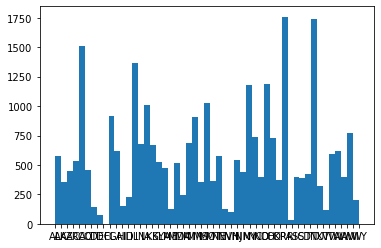

In [ ]:
plt.hist(merged['Geographic Area'], bins=merged.nunique()[0])

Next, we look at the cities in the dataset, to determine which city may be considered the most dangerous. There are 24095 cities. Franklin City has the highest count of all cities in our dataset, 16. The top 5 and the bottom five cities with the respect to the counts are shown.  

In [ ]:
merged['City'].value_counts()

Franklin city        16
Madison city         14
Salem city           14
Marion city          14
Clinton city         13
                     ..
Smiths Grove city     1
Slaughters city       1
Silver Grove city     1
Shively city          1
Y-O Ranch CDP         1
Name: City, Length: 24095, dtype: int64

In [ ]:
test.dropna()
test.interpolate()
test.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        3
age                         40
gender                       0
race                       104
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        38
body_camera                  0
dtype: int64

In [ ]:
test.shape

(507, 14)

In [ ]:
test.info

<bound method DataFrame.info of        id                      name      date manner_of_death         armed  \
0    2261  Kevin Darnell Washington  25/01/17            shot           gun   
1    2262    Donovan Paul Scheurich  25/01/17            shot           gun   
2    2265         Josue Javier Diaz  26/01/17            shot           gun   
3    2266          Kerry Lee Coomer  26/01/17            shot           gun   
4    2267         Deaundre Phillips  26/01/17            shot  undetermined   
..    ...                       ...       ...             ...           ...   
502  2822          Rodney E. Jacobs  28/07/17            shot           gun   
503  2813                     TK TK  28/07/17            shot       vehicle   
504  2818        Dennis W. Robinson  29/07/17            shot           gun   
505  2817             Isaiah Tucker  31/07/17            shot       vehicle   
506  2815              Dwayne Jeune  31/07/17            shot         knife   

      age gender ra

In [ ]:
test.describe()

,id,age
count,507.000000,467.000000
mean,2546.043393,36.710921
std,160.218323,13.643371
min,2261.000000,15.000000
25%,2408.500000,26.000000
50%,2550.000000,34.000000
75%,2682.000000,46.000000
max,2822.000000,91.000000


In [ ]:
test.nunique()

id                         507
name                       471
date                       175
manner_of_death              2
armed                       27
age                         60
gender                       2
race                         5
city                       388
state                       47
signs_of_mental_illness      2
threat_level                 3
flee                         4
body_camera                  2
dtype: int64

In the test data, a gun is the most common way of being armed. The counts of other weapons used is given below.

In [ ]:
test['armed'].value_counts()

gun                        284
knife                       69
vehicle                     52
undetermined                26
unarmed                     23
toy weapon                  17
unknown weapon               6
ax                           3
Taser                        3
crossbow                     2
machete                      2
blunt object                 2
metal stick                  1
piece of wood                1
pipe                         1
metal object                 1
sharp object                 1
baseball bat and bottle      1
beer bottle                  1
hatchet and gun              1
gun and knife                1
metal pipe                   1
rock                         1
fireworks                    1
pen                          1
screwdriver                  1
baseball bat                 1
Name: armed, dtype: int64

With the available data, we can also explore the age and race statistics in the dataset

(array([ 55., 124., 106.,  62.,  49.,  44.,  18.,   6.,   2.,   1.]),
 array([15. , 22.6, 30.2, 37.8, 45.4, 53. , 60.6, 68.2, 75.8, 83.4, 91. ]),
 <a list of 10 Patch objects>)

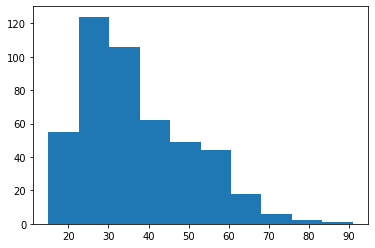

In [ ]:
plt.hist(test['age'])

We see that the age distribution of the victims is unimodal, with most victims being aged between 20 to 30. Let'see how the distrubution compares to the age distributions of different races.



In [ ]:
test['race']

0        B
1        W
2        H
3        W
4        B
      ... 
502    NaN
503    NaN
504    NaN
505      B
506      B
Name: race, Length: 507, dtype: object

In [ ]:
test['race'].value_counts()

W    205
B    111
H     75
A      8
N      4
Name: race, dtype: int64

(array([10., 43., 45., 28., 27., 28., 13.,  4.,  2.,  1.]),
 array([15. , 22.6, 30.2, 37.8, 45.4, 53. , 60.6, 68.2, 75.8, 83.4, 91. ]),
 <a list of 10 Patch objects>)

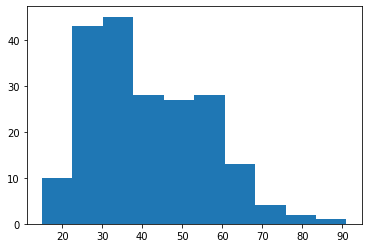

In [ ]:
plt.hist(test[test['race'] == 'W']['age'])

(array([15., 23., 19., 20., 13.,  5.,  9.,  3.,  0.,  2.]),
 array([15. , 20.3, 25.6, 30.9, 36.2, 41.5, 46.8, 52.1, 57.4, 62.7, 68. ]),
 <a list of 10 Patch objects>)

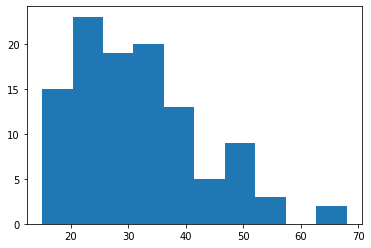

In [ ]:
plt.hist(test[test['race'] == 'B']['age'])

(array([14., 18.,  7., 12.,  4.,  8.,  2.,  4.,  1.,  1.]),
 array([16. , 21.4, 26.8, 32.2, 37.6, 43. , 48.4, 53.8, 59.2, 64.6, 70. ]),
 <a list of 10 Patch objects>)

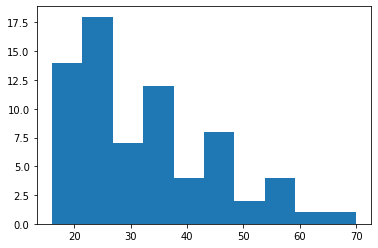

In [ ]:
plt.hist(test[test['race'] == 'H']['age'])

(array([2., 0., 0., 0., 1., 2., 0., 0., 1., 2.]),
 array([18. , 20.7, 23.4, 26.1, 28.8, 31.5, 34.2, 36.9, 39.6, 42.3, 45. ]),
 <a list of 10 Patch objects>)

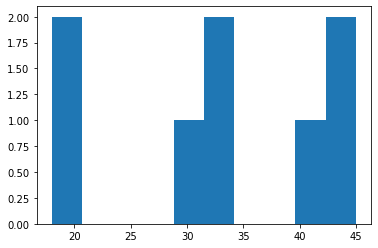

In [ ]:
plt.hist(test[test['race'] == 'A']['age'])

(array([1., 0., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([21. , 22.3, 23.6, 24.9, 26.2, 27.5, 28.8, 30.1, 31.4, 32.7, 34. ]),
 <a list of 10 Patch objects>)

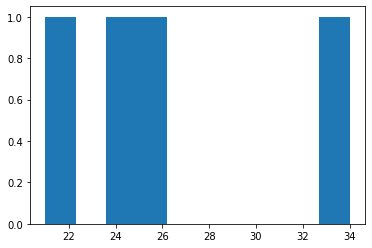

In [ ]:
plt.hist(test[test['race'] == 'N']['age'])

Total number of people killer per race

In [ ]:
test['race'].value_counts()

W    205
B    111
H     75
A      8
N      4
Name: race, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff3f2c25c90>,
 [Text(-0.030009044922820107, 1.0995905861832487, 'W'),
  Text(-0.6665151466238542, -0.8750757449049666, 'B'),
  Text(0.7883559757982855, -0.7671341834536728, 'H'),
  Text(1.0914546861869985, -0.13684541643928316, 'A'),
  Text(1.0994652726450713, -0.03429452212087152, 'N')],
 [Text(-0.016368569957901875, 0.599776683372681, '50.9%'),
  Text(-0.3635537163402841, -0.4773140426754363, '27.5%'),
  Text(0.4300123504354284, -0.4184368273383669, '18.6%'),
  Text(0.5953389197383627, -0.07464295442142717, '2.0%'),
  Text(0.5997083305336752, -0.018706102975020827, '1.0%')])

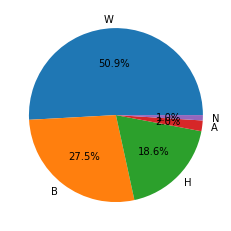

In [ ]:
plt.pie(test['race'].value_counts(), labels=test['race'].value_counts().keys(), autopct='%1.1f%%')

We see that the race of the majority of the victims is white (50.9%), and the age distribution of the victims of this race is similar to the age distribution of all races combined. Victims of the black race account for 27.5% of the victims in this dataset. The age distribution for this race is also similar, but it has a smaller range. The majority of the victims in this race are also aged between 20 and 30. As we look at the races that remain, a similar pattern is observed.

## Modeling and Question Answering